In [2]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
from PIL import Image
import asyncio
import pickle
import scipy.stats
import utils
import torch
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
name = '../data/hawkes_16.pickle'
with open(name, 'rb') as f:
    out = pickle.load(f)

In [5]:
for i in range(len(out)):
    out[i] = np.vstack(out[i])

In [6]:
ds = create_dataset(9000)

  0%|          | 28/9000 [00:00<00:32, 274.32it/s]

100%|██████████| 9000/9000 [00:32<00:00, 275.76it/s]


In [15]:
out_dic = {'event_time': [], 'flag': [], 'trx_count': [], 'pad_category': []}

for i in range(256):
    out_dic[i] = []

for j, obj in tqdm(enumerate(ds)):
    x, y, t = obj[0]
    l = obj[1]

    arr = out[j]
    for i in range(256):
        out_dic[i].append(list(arr[:,i].astype(int)))

    out_dic['event_time'].append(list(t))
    out_dic['flag'].append(l)
    out_dic['trx_count'].append(len(t))
    out_dic['pad_category'].append([0]*256)

9000it [00:24, 360.57it/s]


In [16]:
df = pd.DataFrame(out_dic)

In [17]:
df['pendulum_id'] = np.arange(len(df))

In [18]:
df.head()

,event_time,flag,trx_count,pad_category,0,1,2,3,4,5,...,247,248,249,250,251,252,253,254,255,pendulum_id
0,"[0.09129425537759533, 0.10792134282020369, 0.3...",2.185431,61,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
1,"[0.02511673382758245, 0.0654999279317425, 0.10...",0.531285,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
2,"[0.135003424835367, 0.2538551460338464, 0.2873...",1.130378,67,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
3,"[0.22587905145459264, 0.22694736582862945, 0.2...",2.773636,41,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3
4,"[0.02084041614360645, 0.06358095875309012, 0.0...",2.550455,47,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1

In [19]:
df.loc[:1000].to_parquet('../data/test_hawkes_16.parquet')

/usr/local/lib/python3.10/dist-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


In [20]:
df.loc[1000:].to_parquet('../data/train_hawkes_16.parquet')

In [2]:
test = pd.read_parquet('../data/test_hawkes_16.parquet')
train = pd.read_parquet('../data/train_hawkes_16.parquet')

In [3]:
((test['flag'] - train['flag'].mean())**2).mean()

1.6301901660054905

In [4]:
df = pd.read_parquet('../ckpt/test3-our-gru-TR/seed_0/reconstructed_data.parquet')

In [14]:
x = torch.tensor([float('nan'), float('inf'), -float('inf'), 3.14])
x

tensor([   nan,    inf,   -inf, 3.1400])

In [16]:
torch.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)

tensor([0.0000, 0.0000, 0.0000, 3.1400])

In [25]:
# https://skill-lync.com/student-projects/Simulation-of-a-Simple-Pendulum-on-Python-95518

def sim_pen_eq(t,theta):
	dtheta2_dt = (-b/m)*theta[1] + (-g/L)*np.sin(theta[0])
	dtheta1_dt = theta[1]
	return [dtheta1_dt, dtheta2_dt]

# Initial and end values
st = 0          # Start time (s)
et = 5       # End time (s)
ts = 0.1        # Time step (s)
g = 9.81        # Acceleration due to gravity (m/s^2)
L = 1           # Length of pendulum (m)
b = 0.5         # Damping factor (kg/s)
m = 1           # Mass of bob (kg)
mu = 15
alpha = 0.2

# main

theta1_ini = 0                 # Initial angular displacement (rad)
theta2_ini = 3                 # Initial angular velocity (rad/s)
theta_ini = [theta1_ini, theta2_ini]
t_span = [st,et+ts]


def hawkes_intensity(mu, alpha, points, t):
    """Find the hawkes intensity:
    mu + alpha * sum( np.exp(-(t-s)) for s in points if s<=t )
    """
    p = np.array(points)
    p = p[p <= t]
    p = np.exp(p - t) * alpha
    return mu + np.sum(p)
    #return mu + alpha * sum( np.exp(s - t) for s in points if s <= t )

assert(np.isclose(1, hawkes_intensity(1,2,[],5)))
assert(np.isclose(2, hawkes_intensity(0,2,[5],5)))
assert(np.isclose(4, hawkes_intensity(2,2,[4.9999999],5)))
assert(np.isclose(2, hawkes_intensity(0,2,[4.9999999, 8],5)))
assert(np.isclose(1, hawkes_intensity(1,2,[5, 8],4)))

def simulate_hawkes(mu, alpha, st, et):
    t = st
    points = []
    all_samples = []
    while t < et:
        m = hawkes_intensity(mu, alpha, points, t)
        s = np.random.exponential(scale = 1/m)
        ratio = hawkes_intensity(mu, alpha, points, t + s) / m
        if t + s >= et:
             break
        if ratio >= np.random.uniform():
            points.append(t + s)
        all_samples.append(t + s)
        t = t + s
    return points, all_samples


points, all_samples = simulate_hawkes(mu, alpha, st, et)
print(len(points))

t_ir = points
#t_ir = np.sort(np.random.uniform(st, et+ts, 100))
sim_points = len(points)


70


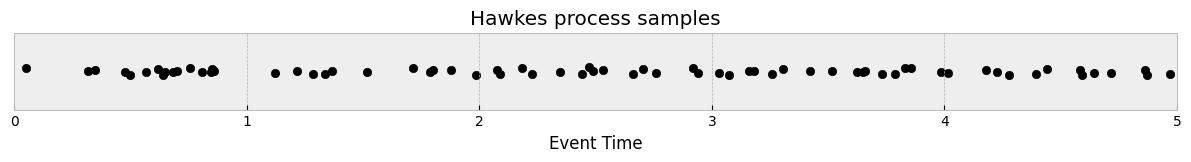

In [26]:
from utils import plot_series

#plot_series(points, 'test', window=[0, 5])
def jitter():
    return (np.random.rand() - 0.5) * 0.2


plt.style.use('bmh')
window = [0, 5]
series = points
title = 'Hawkes process samples'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,1))

ax.set(xlim=window, ylim=[-1, 1], title=title, xlabel="Event Time", yticks=[])
#ax.xaxis.set_label_coords(0.95, -0.3)
ax.scatter(x=series, y=[jitter() for _ in series], marker="o", color="black")
plt.show()

In [27]:
theta12 = solve_ivp(sim_pen_eq, t_span, theta_ini, t_eval = t_ir)
theta1 = theta12.y[0,:]
theta2 = theta12.y[1,:]

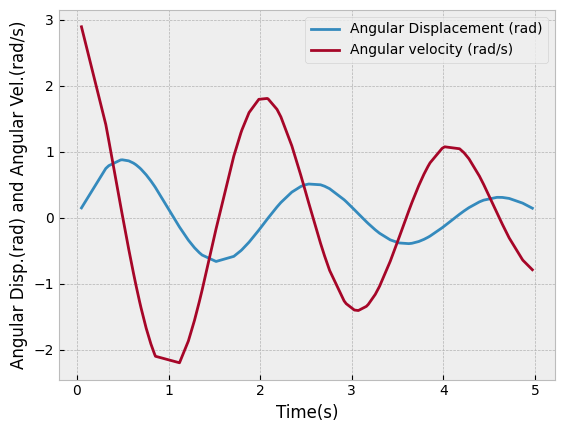

In [28]:
plt.plot(t_ir,theta1,label='Angular Displacement (rad)')
plt.plot(t_ir,theta2,label='Angular velocity (rad/s)')
plt.xlabel('Time(s)')
plt.ylabel('Angular Disp.(rad) and Angular Vel.(rad/s)')
plt.legend()
plt.show()

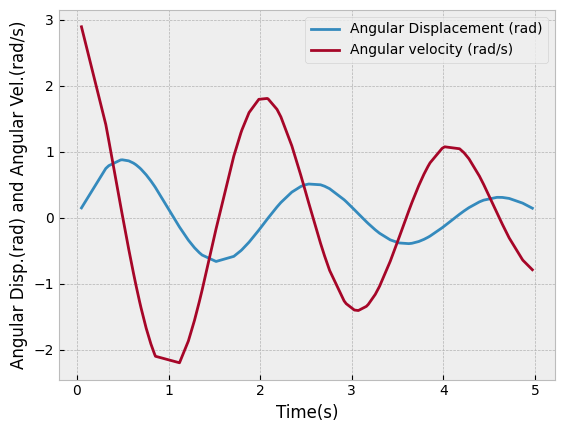

In [29]:

plt.plot(t_ir,theta1,label='Angular Displacement (rad)')
plt.plot(t_ir,theta2,label='Angular velocity (rad/s)')
plt.xlabel('Time(s)')
plt.ylabel('Angular Disp.(rad) and Angular Vel.(rad/s)')
plt.legend()
plt.show()

In [30]:
# Simulation

x = L*np.sin(theta1)
y = -L*np.cos(theta1)


# for point in l:
#     plt.figure()
#     plt.plot(x[point],y[point],'bo',markersize=20)
#     plt.plot([0,x[point]], [0,y[point]])
#     plt.xlim(-L-0.5,L+0.5)
#     plt.ylim(-L-0.5,L+0.5)
#     plt.xlabel('x-direction')
#     plt.ylabel('y-direction')
#     filenumber = point
#     filenumber=format(filenumber,"05")
#     filename="image{}.png".format(filenumber)
#     plt.savefig(filename)
#     plt.close()

/tmp/ipykernel_3530616/393688824.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[point], y[point], 'bo', markersize=8, color='black')


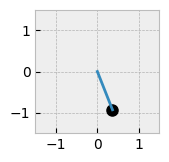

In [18]:
# Create the plot with a small size
point = 3
plt.figure(figsize=(1.6, 1.6))  # 16x16 pixels at 100 dpi
plt.plot(x[point], y[point], 'bo', markersize=8, color='black')
plt.plot([0, x[point]], [0, y[point]])
plt.xlim(-L - 0.5, L + 0.5)
plt.ylim(-L - 0.5, L + 0.5)
#plt.axis('off')  # Turn off axes

# Save the plot as a PNG file with a specific dpi
plt.savefig('plot.png', dpi=10)


/tmp/ipykernel_3530616/47517022.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[point], y[point], 'bo', markersize=8, color='black')


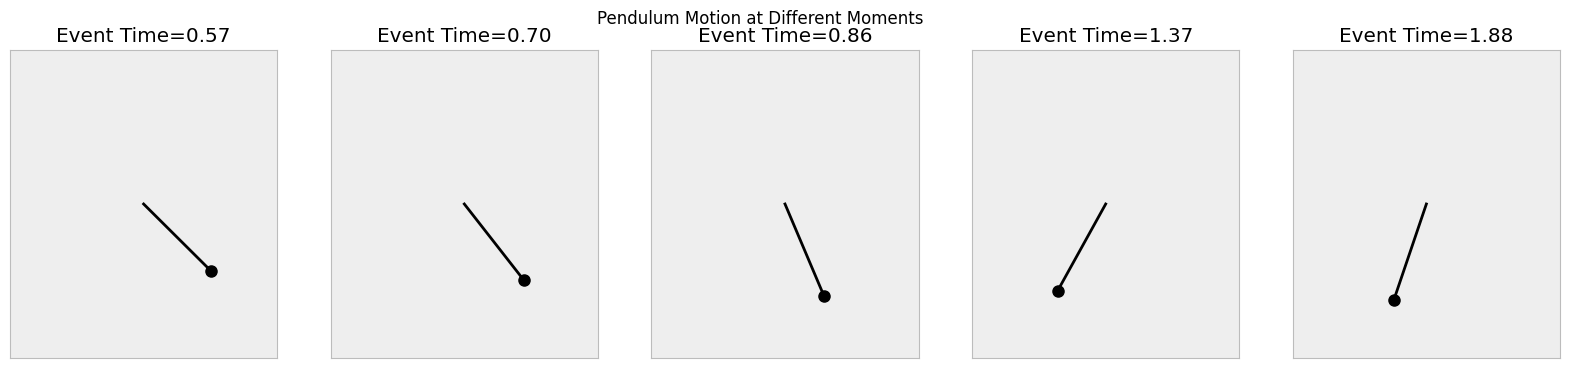

In [40]:
# Points to plot
observations = np.arange(5, 30, 5)  # or [1, 2, 3, 4, 5, 6, 7] for seven points

plt.figure(figsize=(20, 4))  # Adjust the size as needed

# Create subplots for each point
for i, point in enumerate(observations, start=1):
    plt.subplot(1, len(observations), i)
    plt.plot(x[point], y[point], 'bo', markersize=8, color='black')
    plt.plot([0, x[point]], [0, y[point]], color='black')  # Line from origin to the point
    plt.xlim(-L - 0.5, L + 0.5)
    plt.ylim(-L - 0.5, L + 0.5)
    plt.xticks([], [])
    plt.yticks([], [])
    time = points[point]
    plt.title(f"Event Time={time:.2f}")
    plt.grid(True)
    

# Additional settings for the overall figure
#plt.suptitle("Pendulum Motion at Different Moments")
plt.show()

In [138]:

# Load the saved image using PIL and convert it to black and white
img = Image.open('plot.png').convert('1')
img_array = np.array(img)


In [139]:
img_array.shape

(32, 32)

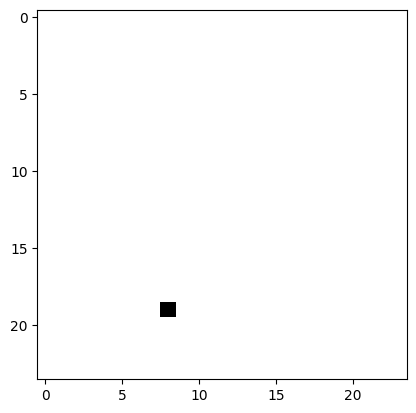

In [79]:

# Display the black and white image
plt.figure()
plt.imshow(img_array, cmap='gray')
#plt.axis('off')
plt.show()

In [23]:
def sim_pen_eq(t,theta):
    dtheta2_dt = (-b/m)*theta[1] + (-g/L)*np.sin(theta[0])
    dtheta1_dt = theta[1]
    return [dtheta1_dt, dtheta2_dt]

def create_sample(L):
    # https://skill-lync.com/student-projects/Simulation-of-a-Simple-Pendulum-on-Python-95518


    # main

    theta1_ini = np.random.uniform(1, 9)                 # Initial angular displacement (rad)
    theta2_ini = np.random.uniform(1, 9)                   # Initial angular velocity (rad/s)
    theta_ini = [theta1_ini, theta2_ini]
    t_span = [st,et+ts]
    sim_points = 100

    t_ir = np.sort(np.random.uniform(st, et+ts, sim_points))
    theta12 = solve_ivp(sim_pen_eq, t_span, theta_ini, t_eval = t_ir)
    theta1 = theta12.y[0,:]
    theta2 = theta12.y[1,:]

    # return x, y 
    # or we could return angles ...
    x = L*np.sin(theta1)
    y = -L*np.cos(theta1)

    return x, y, t_ir

In [24]:
# Initial and end values
st = 0          # Start time (s)
et = 5       # End time (s)
ts = 0.1        # Time step (s)
g = 9.81        # Acceleration due to gravity (m/s^2)
b = 0.5         # Damping factor (kg/s)
m = 1           # Mass of bob (kg)


def create_dataset(size):
    
    output = []

    for i in tqdm(range(size)):
        L = np.random.uniform(0.5, 5)
        sample = create_sample(L)
        output.append((sample, L))
    
    return output


async def point_to_image(x, y, L):
    
    arrs = []
    for point in range(len(x)):
        plt.figure(figsize=(3.2, 3.2))  # 16x16 pixels at 100 dpi
        plt.plot(x[point], y[point], 'bo', markersize=8, color='black')
        #plt.plot([0, x[point]], [0, y[point]])
        plt.xlim(-L - 0.5, L + 0.5)
        plt.ylim(-L - 0.5, L + 0.5)
        plt.axis('off')  # Turn off axes
        # Save the plot as a PNG file with a specific dpi
        plt.savefig('plot.png', dpi=10)
        plt.close()
        # Load the saved image using PIL and convert it to black and white
        img = Image.open('plot.png').convert('1')
        img_array = np.array(img)
        arrs.append(img_array.flatten())

    await arrs

In [30]:
async def get_all_arrs(ds):
    tasks = []
    for obj in ds:
        x, y, t = obj[0]
        l = obj[1]
        tasks.append(np.vstack(point_to_image(x, y, l)))

    await asyncio.gather(*tasks)


In [32]:
ds = create_dataset(100)

100%|██████████| 100/100 [00:00<00:00, 430.67it/s]


In [33]:
loop = asyncio.get_event_loop()
out = loop.run_until_complete(get_all_arrs(ds))

RuntimeError: This event loop is already running

In [26]:
out_dic = {'event_time': [], 'flag': []}

for i in range(1024):
    out_dic[i] = []

for obj in tqdm(ds):
    x, y, t = obj[0]
    l = obj[1]

    arr = point_to_image(x, y, l)
    arr = np.vstack(arr)
    for i in range(1024):
        out_dic[i].append(list(arr[:,i].astype(int)))

    out_dic['event_time'].append(list(t))
    out_dic['flag'].append(l)

  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_702326/1369941581.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[point], y[point], 'bo', markersize=8, color='black')
  0%|          | 12/10000 [00:27<6:19:33,  2.28s/it]


KeyboardInterrupt: 

<Figure size 320x320 with 0 Axes>

In [28]:
total_arr = []
for obj in tqdm(ds):
    x, y, t = obj[0]
    l = obj[1]

    arr = point_to_image(x, y, l)
    total_arr.append(arr)

  0%|          | 0/10000 [00:00<?, ?it/s]/tmp/ipykernel_702326/1369941581.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[point], y[point], 'bo', markersize=8, color='black')
  0%|          | 6/10000 [00:14<6:49:35,  2.46s/it]


KeyboardInterrupt: 

<Figure size 320x320 with 0 Axes>

In [18]:
t[-1]

5.044290916766202

In [19]:
ds

[((array([-0.70810034, -0.79818578, -0.95785008, -1.03726353, -1.166661  ,
          -1.28834001, -1.29643753, -1.36465839, -1.36558235, -1.36930147,
          -1.35825703, -1.32289964, -1.14770376, -0.78295828, -0.41636954,
          -0.39039871, -0.26859256, -0.24965595,  0.01398477,  0.1396022 ,
           0.34710418,  0.36879809,  0.52511445,  0.74884962,  0.83052618,
           0.92228499,  1.16953703,  1.26913884,  1.27154813,  1.29671157,
           1.2967216 ,  1.31940716,  1.3566233 ,  1.36795194,  1.361587  ,
           1.36627672,  1.36913697,  1.34844329,  1.34589982,  1.34429719,
           1.25778569,  1.17592596,  1.03849894,  0.87831584,  0.84396897,
           0.77691463,  0.55041922, -0.3355571 , -1.05472129, -1.09653594,
          -1.19290295, -1.2408826 , -1.2645313 , -1.27418815, -1.27124143,
          -1.27122426, -1.26746   , -1.23124843, -1.19915995, -1.19532264,
          -1.00130476, -0.89539091, -0.71893659, -0.50894286,  0.32357461,
           0.52889497,  0